In [2]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.offline as py
import random 

In [3]:
from pylab import rcParams
from datetime import datetime as dt

In [4]:
data = pd.read_csv('./googleplaystore.csv')

In [5]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1996,Swamp Attack,GAME,4.4,2119235,70M,"50,000,000+",Free,0,Everyone 10+,Action,"June 29, 2018",3.0.1,4.1 and up
7620,Formula Cartoon All Stars,FAMILY,3.9,1213,18M,"10,000+",Paid,$2.99,Everyone,Racing;Action & Adventure,"June 25, 2015",4.1.2,2.3.3 and up
2274,"Migraine, Headache Diary HeadApp Pro",MEDICAL,4.6,156,22M,500+,Paid,$3.49,Everyone,Medical,"March 14, 2018",1.10.0.user.pro.release,4.4 and up
5273,AK-47: Simulator and Shooting,FAMILY,4.0,345,14M,"100,000+",Free,0,Everyone 10+,Simulation,"November 11, 2016",1.3.0,3.0 and up
7527,CL Pebble Apps,LIFESTYLE,3.6,67,499k,"5,000+",Free,0,Everyone,Lifestyle,"December 23, 2015",3.5,4.0 and up
6296,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341234,30M,"10,000,000+",Free,0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
6720,Loved by King Bs,FAMILY,4.6,5546,85M,"100,000+",Free,0,Everyone,Simulation,"June 15, 2018",1.21,4.0.3 and up
2881,Blur Image Background,PHOTOGRAPHY,3.9,129272,11M,"10,000,000+",Free,0,Everyone,Photography,"July 30, 2018",1.32,4.1 and up
4498,Fossil Q Legacy,LIFESTYLE,2.6,680,60M,"50,000+",Free,0,Everyone,Lifestyle,"September 19, 2017",1.0.1,4.4 and up
1915,Garena Free Fire,GAME,4.5,5476569,53M,"100,000,000+",Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up


In [6]:
print(data.shape)

(10841, 13)


In [7]:
print(data.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [8]:
print("Dataframe has following datatypes:", "\n", data.dtypes) # look at the # of datatypes in the dataframe
print("Number of null values per column:", "\n", data.isnull().sum()) # look at # of null values per column

Dataframe has following datatypes: 
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
Number of null values per column: 
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


# checking for missing values

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6) 

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [10]:
data.dropna(how ='any', inplace = True)

# Checking missing values again

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6) 

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


Checking the shape of data again after removing missing values

In [12]:
print(data.shape)

(9360, 13)


After remove missing values, our data contain 9,360 records with 13 fields

## look at the distribution of app ratings in a distplot

Text(0.5, 1.0, 'Distribution of App Ratings')

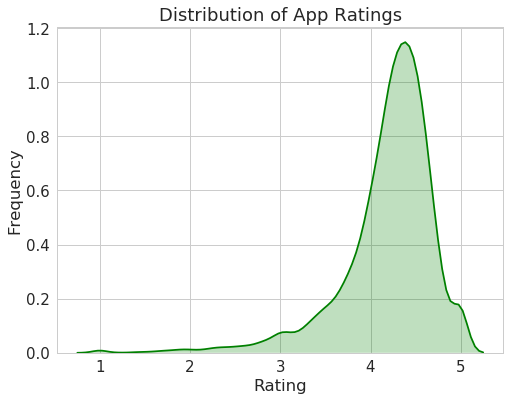

In [12]:
sns.set(font_scale=1.5, style = "whitegrid") #set the font size and background
f, axes = plt.subplots(figsize=(8,6), sharex=True) #set the plotsize

g = sns.distplot(data.Rating, hist=False, color="g", kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")

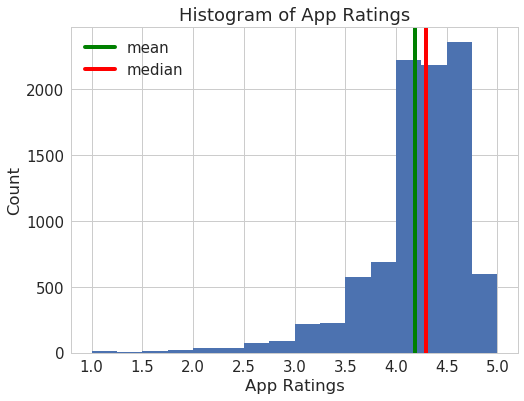

In [13]:
plt.figure(figsize=(8,6))
plt.hist(data.Rating, range=(1,5), bins=16)
plt.axvline(x=data.Rating.mean(), linewidth=4, color='g', label="mean")
plt.axvline(x=data.Rating.median(), linewidth=4, color='r', label="median")
plt.xlabel("App Ratings")
plt.ylabel("Count")
plt.title("Histogram of App Ratings")
plt.legend(["mean", "median"])
plt.show() 

##  What is the average rating per category, how many apps are there in each category?

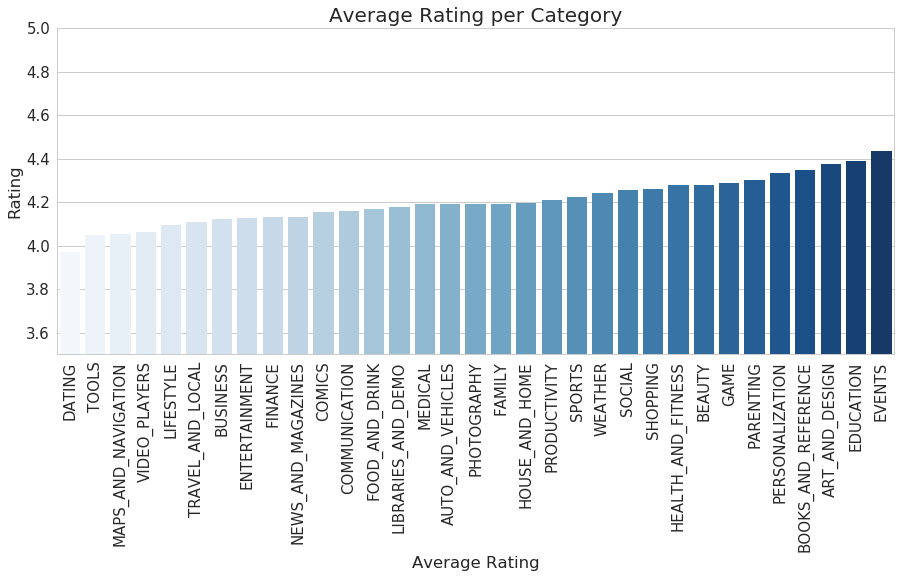

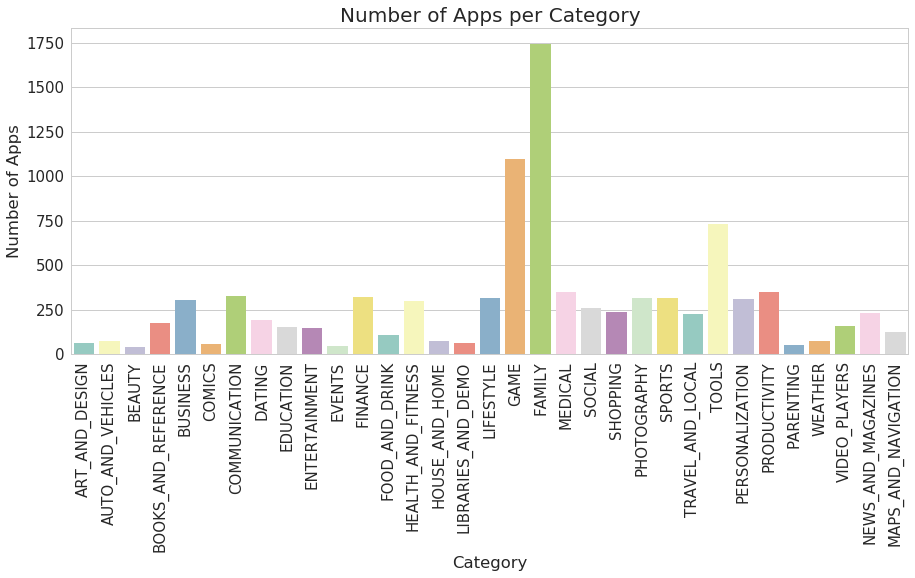

In [14]:
new_df = data.groupby("Category").Rating.mean().reset_index() #average ratings per category
sorted_df = new_df.sort_values(by=["Rating"], ascending=True)  #sort by rating in descending order

sns.set(font_scale=1.5, style="whitegrid")
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we have categorical data in the x axis, we will look data with a barplot
ax = sns.barplot(x="Category", y="Rating", data=sorted_df, palette="Blues") 
for item in ax.get_xticklabels():
    item.set_rotation(90) #rotate every xticklabels for readability
ax.set(ylim=(3.5,5)) #zoom in y axes since values are distributed around 4
plt.xlabel("Average Rating")
plt.title("Average Rating per Category", size=20)

#look at the number of apps per category
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we are going to count # of apps per each category we are going to use barplot
ax = sns.countplot(x="Category", data=data, palette="Set3")
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category", size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90) 

## Business and Dating apps, is the average rating signifcantly different in each category?

Standard deviation of business app ratings: 0.6233904980479363
Standard deviation of dating app ratings: 0.6288915140858174


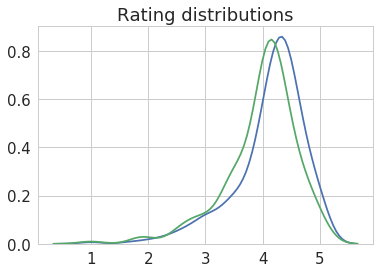

In [15]:
#load data into numpy arrays
business = list(data[data.Category == "BUSINESS"].Rating)
dating = list(data[data.Category == "DATING"].Rating)

# 1) samples should be normally distributed: two samples resembles normal distribution
sns.kdeplot(business)
sns.kdeplot(dating)
plt.title("Rating distributions")

# 2) 2 populations standard deviations must be equal: standard deviations are equal
business_array = np.asarray(business)
dating_array = np.asarray(dating)

print("Standard deviation of business app ratings:", business_array.std())
print("Standard deviation of dating app ratings:", dating_array.std())

# 3) two distributions are already independent from each other

## p-test

## What is the distribution of rating per number of installs and type (paid or free) ?

Text(0.5, 1.0, 'Ratings per Type and Install Category')

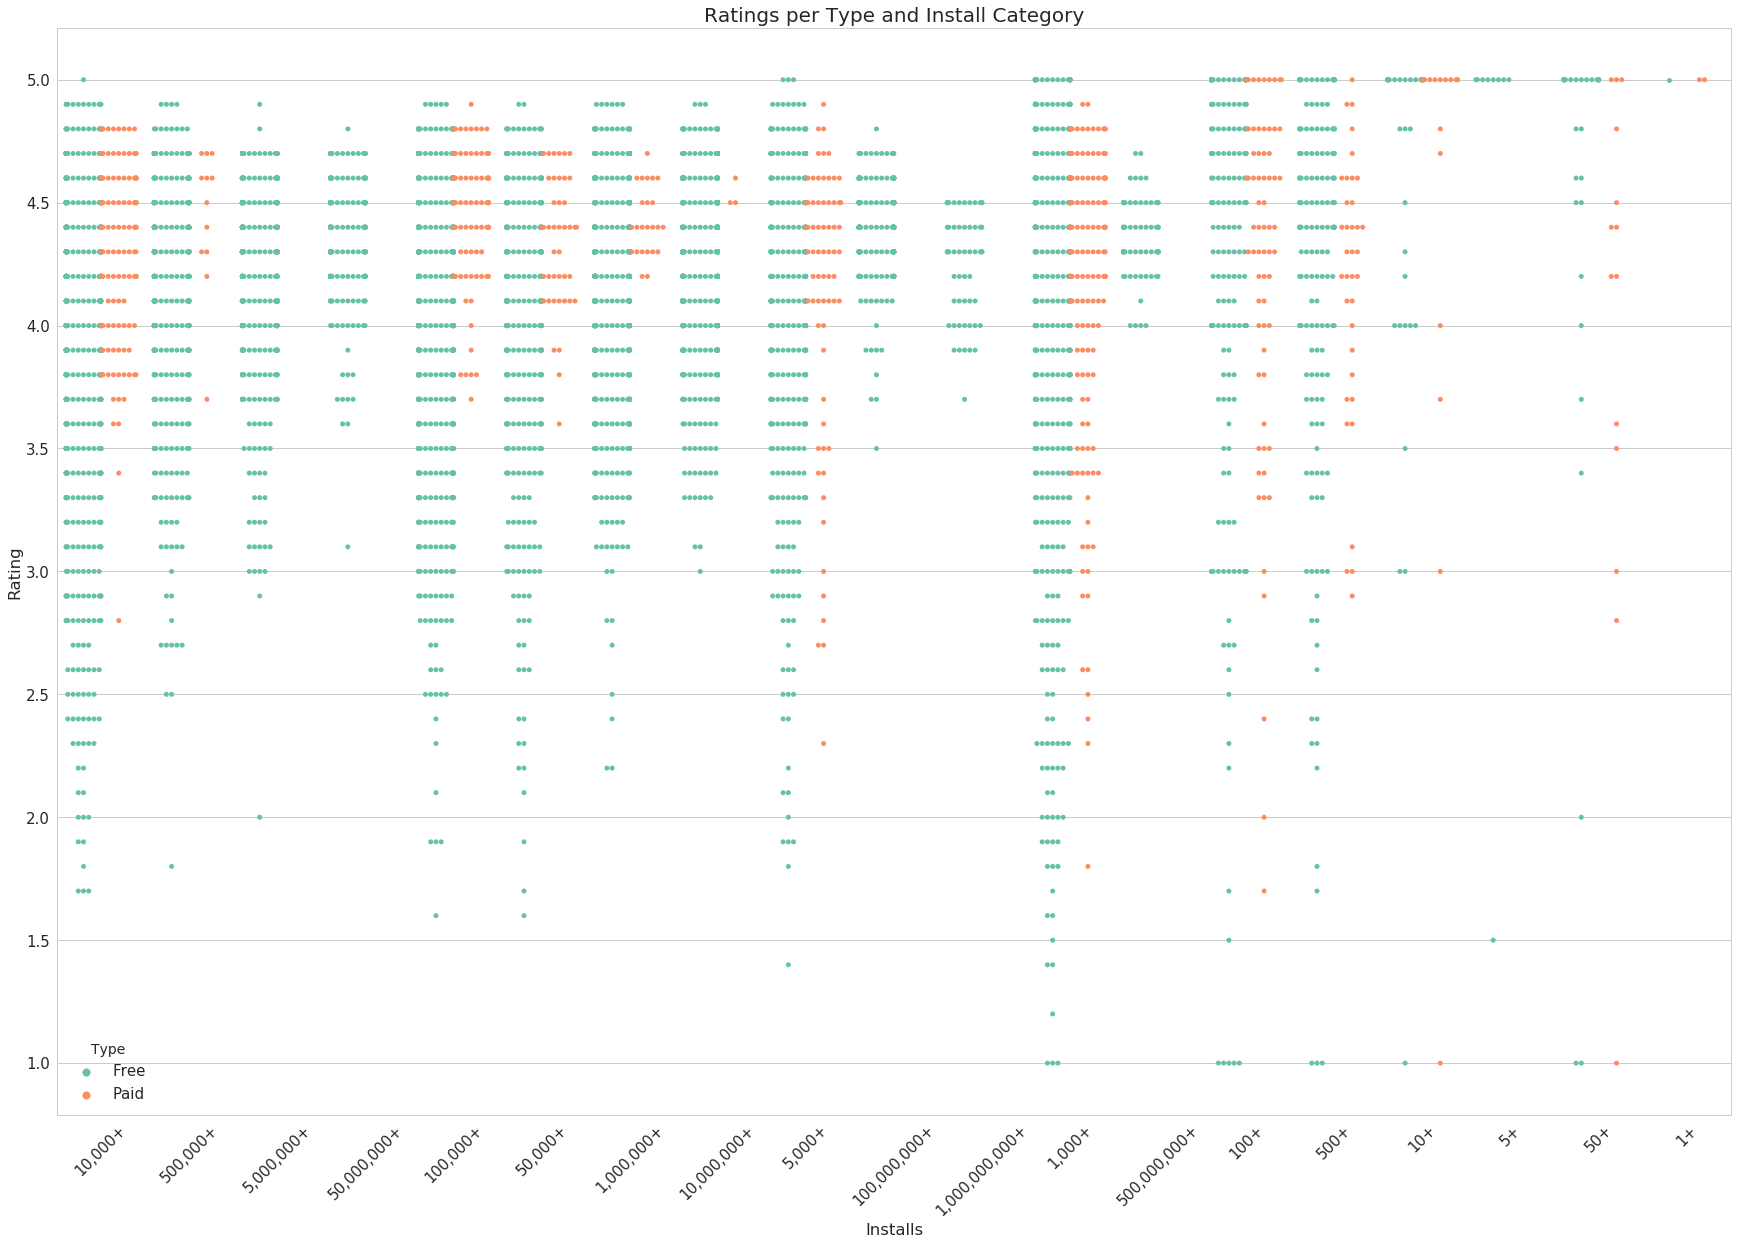

In [16]:
#plot a swarmplot since there are multiple categories (Installs and Type)
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.swarmplot(x="Installs", y="Rating", data=data, hue="Type", palette="Set2", dodge=True)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.title("Ratings per Type and Install Category", size=20)



# Percentage of paid and free apps in Play Store?

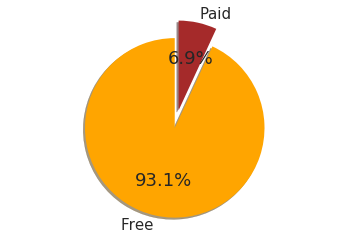

In [17]:
# plot a pie chart
labels = data.Type.unique() #set labels
sizes = [len(data[data.Type == "Free"]), len(data[data.Type == "Paid"])] #count the number of free and paid apps
explode = (0, 0.2) #emphasize "Paid" apps

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["orange","brown"]) #plot pie chart
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() #render plot

## If an app has high number of installs, does it mean that it gets the more reviews from the users?

In [30]:
#remember that # of reviews are in object dtype
data.Reviews = data.Reviews.apply(lambda x: int(x)) #convert object into int

#look at the total reviews per install category
#total_reviews = data.groupby('Installs').sum().reset_index()
total_reviews = data.groupby('Installs').Reviews.sum().reset_index() 
sorted_total_reviews = total_reviews.sort_values(by='Reviews', ascending=False).reset_index(drop=True)
print(sorted_total_reviews.head(5))

         Installs     Reviews
0    100,000,000+  1910541071
1  1,000,000,000+  1237498538
2    500,000,000+   716931632
3     10,000,000+   453887077
4     50,000,000+   356117879


In [32]:
#look at the distribution of the reviews per top-review install category
#since this a distribution per categorical data boxplot will be plotted

g = sns.catplot(x="Installs",
                y="Reviews",
                data=data[(data.Installs == "1,000,000,000+") | (data.Installs == "500,000,000+") | 
                        (data.Installs == "100,000,000+")], 
            kind="box", height = 8 ,palette = "Set2")

plt.hist(data, bins = 10)
plt.ticklabel_format(style='plain', axis='y')
#g.set_yticklabels(["0","10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M"])
plt.title("Distribution of Reviews for Popular Apps", size=20) 


AttributeError: module 'seaborn' has no attribute 'catplot'


### App - Reviews

    Popular apps (apps having more than 100M installs) received more reviews in total
    1,000,000,000+ apps have more ditributed reviews
    Apps downloaded more than 100M received more attention
    100M+ apps have more apps having outlier reviews



### Apps having reviews greater than 60M

In [34]:
print(data.App[data.Reviews>60000000].unique())

['WhatsApp Messenger' 'Facebook' 'Instagram']


## Does every popular app (Installs 100M+) receives a review from each download ?

In [36]:
#we are going to look the ratio of installs to review per app

data['Int_installs'] = data.Installs.replace(to_replace = ['\,','\+'], value=['',''], regex=True) 
#create new column, remove special characters for integer conversion

data.Int_installs = data.Int_installs.astype('int64') 
#change data type from string to integer

data['Review_to_Install_Ratio'] = data.Reviews / data.Int_installs

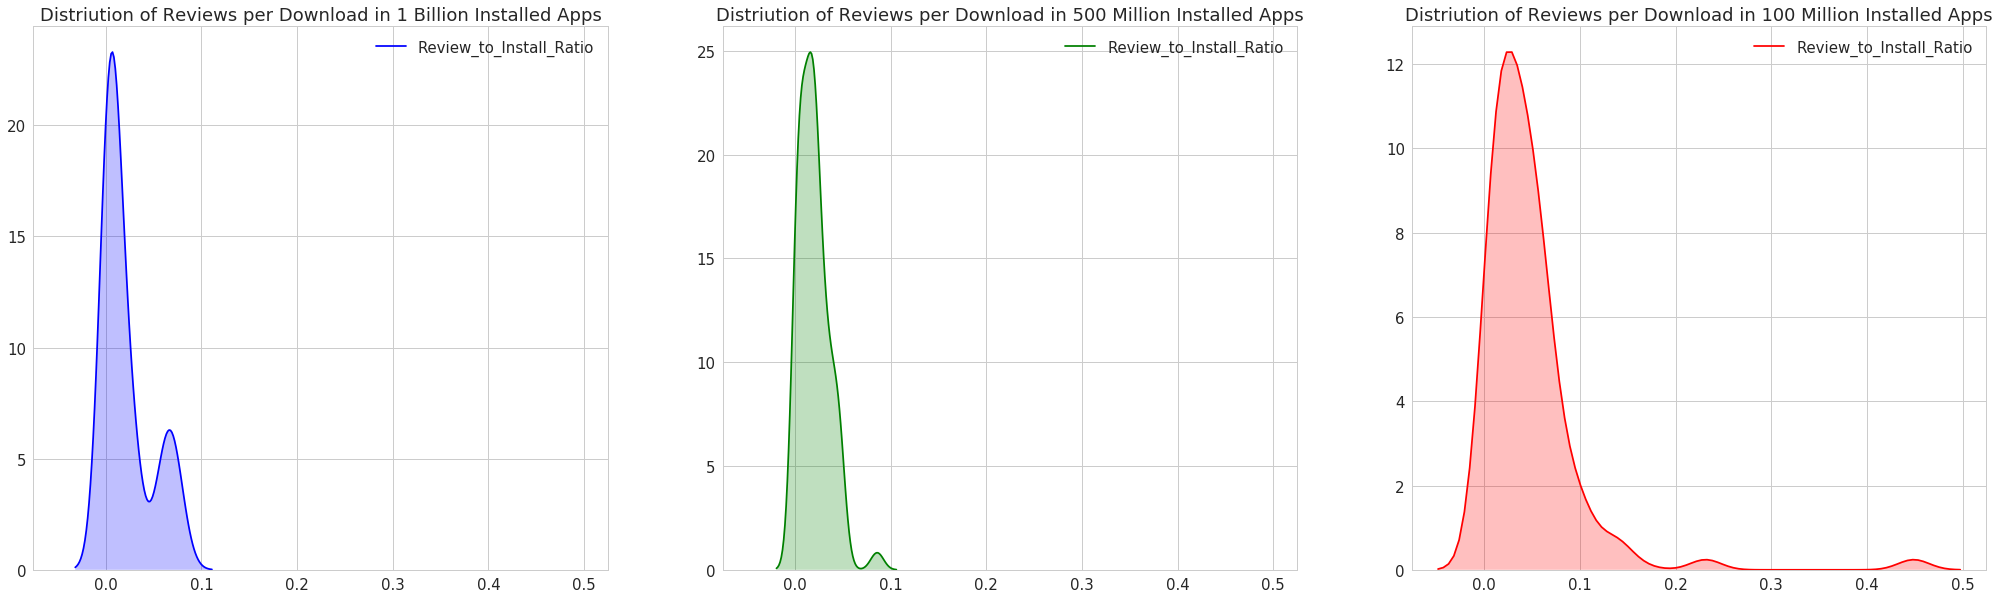

In [38]:
#then plot the distribution per each popular install category
f, axes = plt.subplots(1, 3, figsize=(35, 10), sharex=True) #set the plotsize, divide plot into 3 columns

g1 = sns.kdeplot(data.Review_to_Install_Ratio[data.Installs == "1,000,000,000+"], shade=True, ax=axes[0], color="blue")
g1.title.set_text("Distriution of Reviews per Download in 1 Billion Installed Apps")

g2 = sns.kdeplot(data.Review_to_Install_Ratio[data.Installs == "500,000,000+"], shade=True, ax=axes[1], color="green")
g2.title.set_text("Distriution of Reviews per Download in 500 Million Installed Apps")

g3 = sns.kdeplot(data.Review_to_Install_Ratio[data.Installs == "100,000,000+"], shade=True, ax=axes[2],color="red")
g3.title.set_text("Distriution of Reviews per Download in 100 Million Installed Apps")


### Reviews - Installs for popular apps

    Since the distribution is concantrated around 0, we cannot conclude that every downloader leaves a review 
    for a popular app.
    In the 100 Million Install Category, there are more reviews per download compared to other categories.



## Do we have a correlation between price of the app and rating?

Text(0.5, 1.0, 'Price VS Rating')

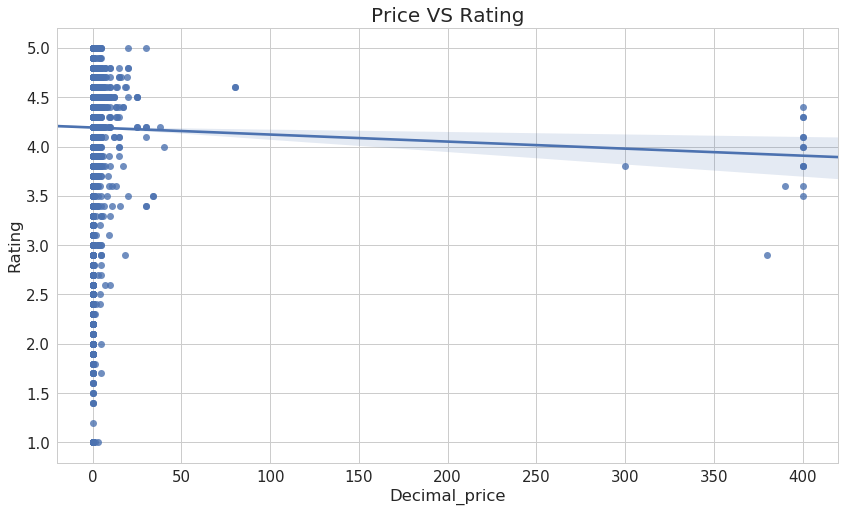

In [21]:
#we are going to plot multiple linear regressions to answer this question
#linear regression looks for the correlation between continuous variables
#price was string so change it to integer

data['Decimal_price'] = data.Price.replace(to_replace = '\$', value='', regex=True)
#add new column and remove special characters

data.Decimal_price = data.Decimal_price.astype('float')
#change to float

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Decimal_price", y="Rating", data=data)
plt.title("Price VS Rating", size=20)

### Price VS Rating


    Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore
    Looks like apps either has a price lower than 100, or price greater than 300


## What if we only look price as a categorical data, does the price-rating correlation change?

Mean price in the dataframe is: 0.9612788461538462


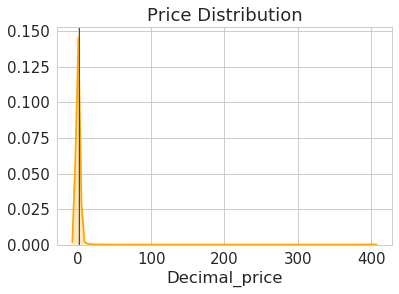

In [22]:
#look at the price distribution to determine price bins
g2 = sns.distplot(data.Decimal_price, hist=False, color="orange", kde_kws={"shade": True})
plt.axvline(x=data.Decimal_price.mean(), c="g", linewidth=1)
plt.title("Price Distribution")
print("Mean price in the dataframe is:", data.Decimal_price.mean()) 

In [23]:
#change price data into categorical data
#plot lmplot since we have changed the data into categorical data
data["Categorical_price"] = data.Decimal_price#.apply() 
sns.lmplot(x="Categorical_price", y="Rating", data=data, height=8.27, aspect=14.1/8.27)
plt.title("Categorical Price VS Rating")

TypeError: lmplot() got an unexpected keyword argument 'height'

## Content rating

In [27]:
data['Content Rating'].unique() 

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [39]:
data['Content Rating'] = data['Content Rating'].map({'Everyone': 'child',
                                                     'Teen':'everyone',
                                                     'Everyone 10+':'teenager',
                                                     'Mature 17+':'adults',
                                                     'Adults only 18+':'adults',
                                                     'Unrated':'unrated'}) 

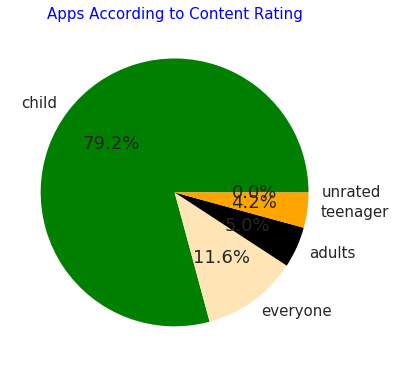

In [40]:
labels = data['Content Rating'].value_counts().index
colors = ['g','moccasin','black','orange','brown']
explode = [0,0,0,0,0]
sizes = data['Content Rating'].value_counts().values

# visual 
plt.figure(0,figsize = (6,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Apps According to Content Rating',color = 'blue',fontsize = 15)
plt.show()

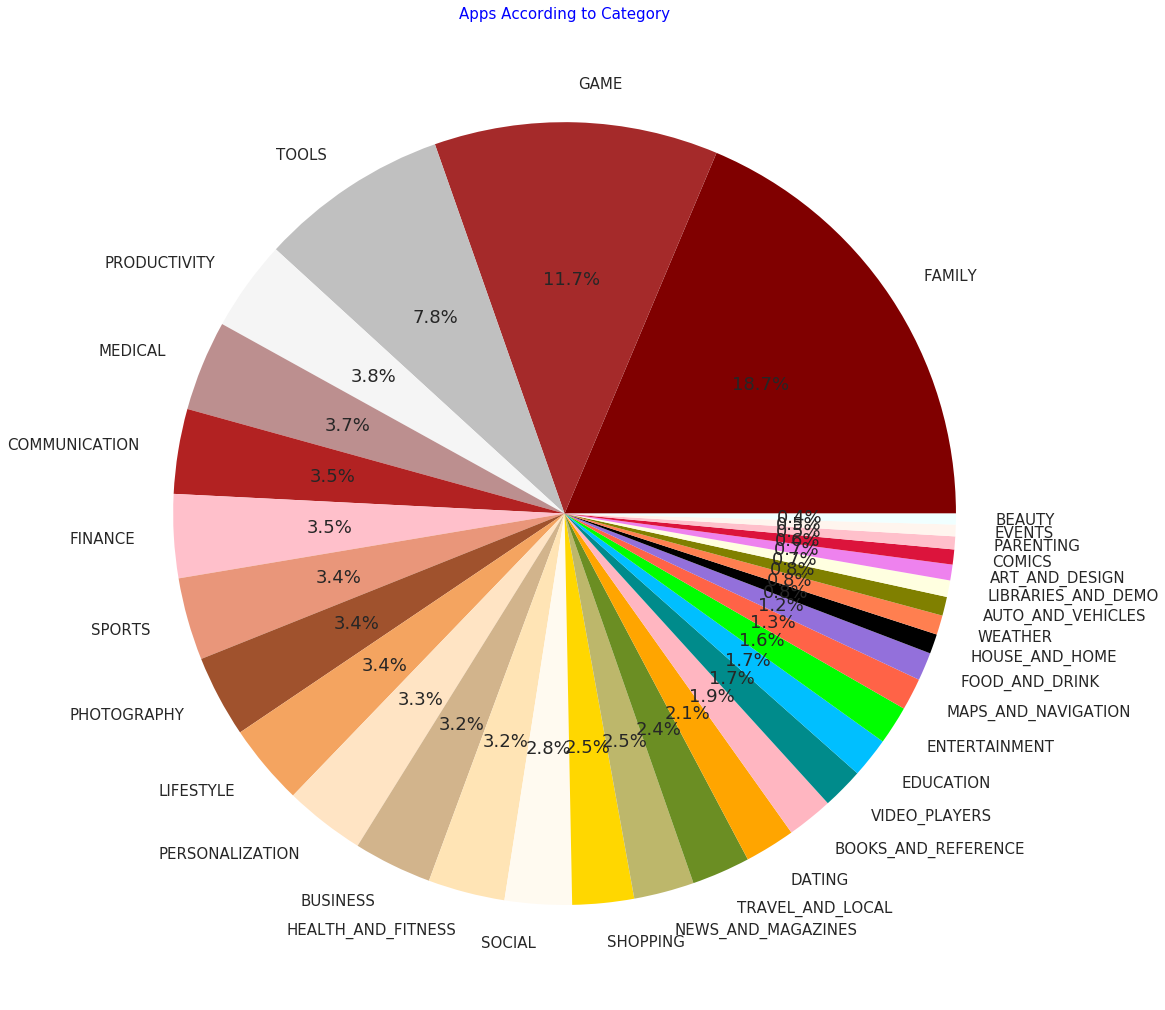

In [26]:
labels = data.Category.value_counts().index
colors = ["maroon","brown","silver","whitesmoke","rosybrown",
          "firebrick","pink","darksalmon","sienna","sandybrown",
          "bisque","tan","moccasin","floralwhite","gold",
          "darkkhaki","olivedrab","orange","lightpink","darkcyan",
          "deepskyblue","lime","tomato","mediumpurple","black",
          "coral","olive","lightyellow","violet","crimson",
          "pink","seashell","azure"]
explode = [0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0]
sizes = data.Category.value_counts().values

# visual 
plt.figure(0,figsize = (18,18))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Apps According to Category',color = 'blue',fontsize = 15)
plt.show()



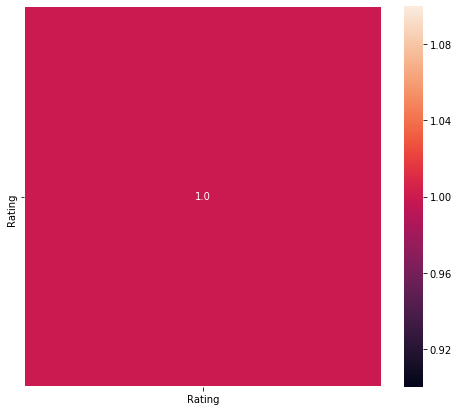

In [19]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(data[["Reviews","Price","Rating","Installs","Size"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show() 